#What I learned

### 1. Linear gaussian system


$$ prior : \ p(\mathbf{z}) = \mathcal{N}(\mathbf{z} \mid \boldsymbol{\mu}_0, \boldsymbol{\Sigma}_0)$$$$$$
$$Likelihood: \ p(\mathbf{y} \mid \mathbf{z}) = \mathcal{N}(\mathbf{y} \mid \mathbf{Az} + \mathbf{b}, \boldsymbol{\Sigma}_y) \ (A: linear \ transform \ matrix, \ b: offset vector)$$$$$$
$$posterior: \ p(\mathbf{z} \mid \mathbf{y}) = \mathcal{N}(\mathbf{z} \mid \boldsymbol{\mu}_{z|y}, \boldsymbol{\Sigma}_{z|y})$$$$$$
$$posterior \ precision: \boldsymbol{\Sigma}_{z|y}^{-1} = \boldsymbol{\Sigma}_0^{-1} + \mathbf{A}^\top \boldsymbol{\Sigma}_y^{-1} \mathbf{A}$$$$$$
$$normalization \ constant: \ p(\mathbf{y}) = \mathcal{N}(\mathbf{y} \mid \mathbf{A}\boldsymbol{\mu}_0 + \mathbf{b}, \boldsymbol{\Sigma}_y + \mathbf{A}\boldsymbol{\Sigma}_0 \mathbf{A}^\top)$$


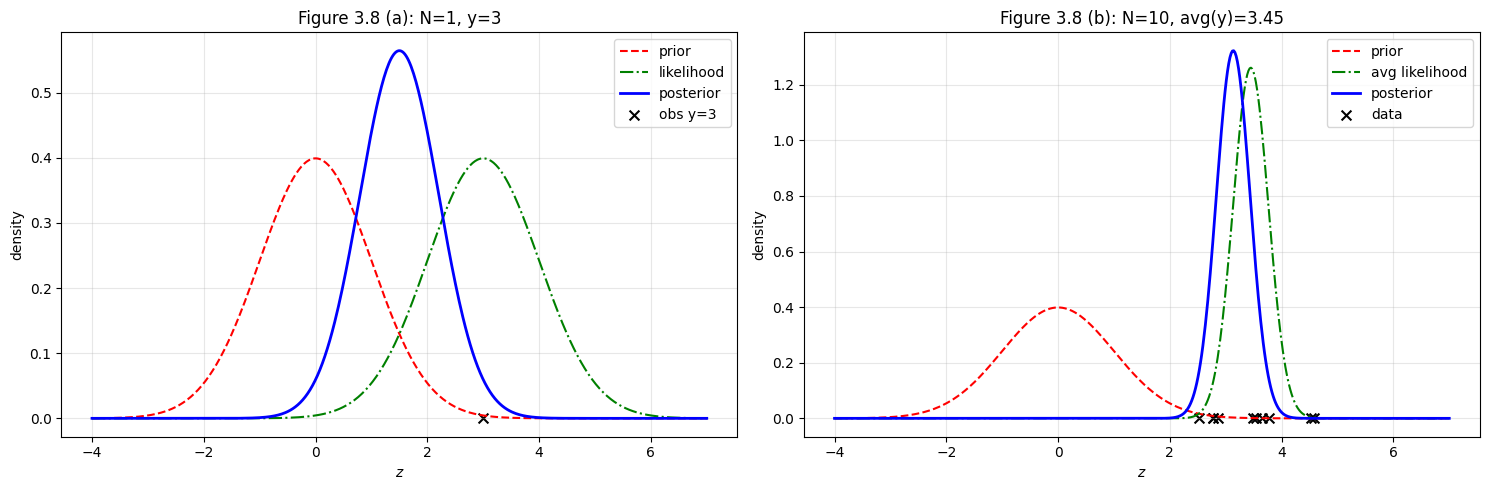

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_inference(ax, data, title):
    # 파라미터 설정
    mu_0, sigma_0 = 0, 1     # Prior: N(0, 1)
    sigma_y = 1              # Noise: N(z, 1)

    # 정밀도 계산 (lambda = 1/sigma^2)
    lambda_0 = 1 / (sigma_0**2)
    lambda_y = 1 / (sigma_y**2)

    # 데이터 요약
    n = len(data)
    y_bar = np.mean(data)

    # 사후 분포 계산 (p.154 정보 형태)
    lambda_n = lambda_0 + n * lambda_y
    sigma_n = np.sqrt(1 / lambda_n)
    mu_n = (lambda_0 * mu_0 + n * lambda_y * y_bar) / lambda_n

    # 시각화 데이터 생성
    x = np.linspace(-4, 7, 500)
    prior = norm.pdf(x, mu_0, sigma_0)
    posterior = norm.pdf(x, mu_n, sigma_n)

    # 개별 데이터의 Likelihood (평균적 위치 표시를 위해 y_bar 기준)
    likelihood = norm.pdf(x, y_bar, sigma_y / np.sqrt(n) if n > 0 else sigma_y)

    # 그리기
    ax.plot(x, prior, 'r--', label='prior', linewidth=1.5)
    ax.plot(x, likelihood, 'g-.', label='likelihood' if n==1 else 'avg likelihood', linewidth=1.5)
    ax.plot(x, posterior, 'b-', label='posterior', linewidth=2)

    # 실제 데이터 위치 표시
    ax.scatter(data, np.zeros_like(data), color='k', marker='x', s=50, label='data' if n>1 else 'obs y=3')

    ax.set_title(title)
    ax.set_xlabel("$z$")
    ax.set_ylabel("density")
    ax.legend()
    ax.grid(True, alpha=0.3)

# 데이터 준비
data_a = [3]  # (a) 단일 관측
np.random.seed(42)
data_b = np.random.normal(3, 1, 10)  # (b) 10개의 관측 (평균 3 근처)

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plot_inference(ax1, data_a, "Figure 3.8 (a): N=1, y=3")
plot_inference(ax2, data_b, f"Figure 3.8 (b): N=10, avg(y)={np.mean(data_b):.2f}")

plt.tight_layout()
plt.show()